In [1]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
pd.pandas.set_option('display.max_columns',None)

In [2]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [4]:
df.shape

(1470, 35)

## Missing values

In [5]:
df.isnull().any().any()

False

## Attrition Distribution

In [7]:
df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

## Correlation Map

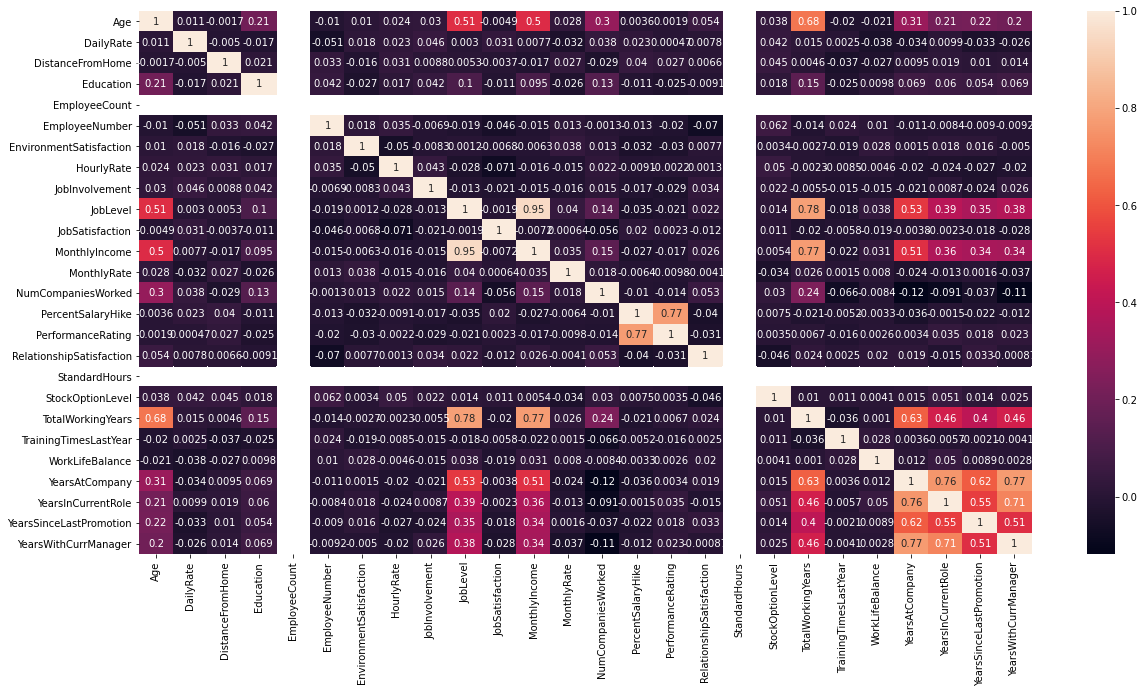

In [8]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

## Removing constant values

In [9]:
df = df.drop(labels=['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis=1)

## Splitting Dataset

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop(labels=['Attrition'],axis=1),
                                               df['Attrition'],
                                               test_size=0.3,
                                               stratify=df['Attrition'],
                                              random_state=100)

In [11]:
X_train.reset_index(drop=True).to_csv('Data/X_train_org.csv',index=False)
X_test.reset_index(drop=True).to_csv('Data/X_test_org.csv',index=False)

In [12]:
y_train.reset_index(drop=True).to_csv('Data/y_train_org.csv',index=False)
y_test.reset_index(drop=True).to_csv('Data/y_test_org.csv',index=False)

# Encoding

In [13]:
## Label Encoding Attrition

attrition_map = {
    'Yes' : 1,
    'No' : 0
}

y_train = y_train.map(attrition_map)
y_test = y_test.map(attrition_map)

In [14]:
X_train['BusinessTravel'].unique()

array(['Non-Travel', 'Travel_Frequently', 'Travel_Rarely'], dtype=object)

In [15]:
## Label encoding 'BusinessTravel' as it is Ordinal feature

businessTravel_map = {
    'Travel_Frequently' : 2,
    'Travel_Rarely' : 1,
    'Non-Travel' : 0
}

X_train['BusinessTravel'] = X_train['BusinessTravel'].map(businessTravel_map)
X_test['BusinessTravel'] = X_test['BusinessTravel'].map(businessTravel_map)

In [16]:
from sklearn.preprocessing import OneHotEncoder

In [17]:
nominal_categories = ['Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']

train_nominal_cat = pd.get_dummies(data=X_train[nominal_categories],drop_first=True)

In [18]:
train_enc_nominal_cat = dict()

for col in train_nominal_cat.columns.values:
    splitted = col.split('_')
    if(splitted[0] not in train_enc_nominal_cat):
        train_enc_nominal_cat[splitted[0]] = []
    train_enc_nominal_cat[splitted[0]].append(splitted[1])
train_enc_nominal_cat

{'Department': ['Research & Development', 'Sales'],
 'EducationField': ['Life Sciences',
  'Marketing',
  'Medical',
  'Other',
  'Technical Degree'],
 'Gender': ['Male'],
 'JobRole': ['Human Resources',
  'Laboratory Technician',
  'Manager',
  'Manufacturing Director',
  'Research Director',
  'Research Scientist',
  'Sales Executive',
  'Sales Representative'],
 'MaritalStatus': ['Married', 'Single'],
 'OverTime': ['Yes']}

In [19]:
test_nominal_cat = pd.get_dummies(data=X_test[nominal_categories],drop_first=True)

test_enc_nominal_cat = dict()

for col in test_nominal_cat.columns.values:
    splitted = col.split('_')
    if(splitted[0] not in test_enc_nominal_cat):
        test_enc_nominal_cat[splitted[0]] = []
    test_enc_nominal_cat[splitted[0]].append(splitted[1])
test_enc_nominal_cat

{'Department': ['Research & Development', 'Sales'],
 'EducationField': ['Life Sciences',
  'Marketing',
  'Medical',
  'Other',
  'Technical Degree'],
 'Gender': ['Male'],
 'JobRole': ['Human Resources',
  'Laboratory Technician',
  'Manager',
  'Manufacturing Director',
  'Research Director',
  'Research Scientist',
  'Sales Executive',
  'Sales Representative'],
 'MaritalStatus': ['Married', 'Single'],
 'OverTime': ['Yes']}

In [20]:
shared_items = {k: train_enc_nominal_cat[k] for k in train_enc_nominal_cat if k in test_enc_nominal_cat and train_enc_nominal_cat[k] == test_enc_nominal_cat[k]}

print('Difference between categories encoded between training and test:',len(train_enc_nominal_cat)-len(shared_items))

Difference between categories encoded between training and test: 0


In [21]:
X_train = pd.concat([X_train.reset_index(drop=True),train_nominal_cat.reset_index(drop=True)],axis=1)
X_train = X_train.drop(labels=nominal_categories,axis=1)
X_train.head()

,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,43,0,1344,7,3,4,37,4,1,4,2089,5228,4,14,3,4,3,7,3,4,5,4,2,2,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,50,2,562,8,2,2,50,3,2,3,6796,23452,3,14,3,1,1,18,4,3,4,3,1,3,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,1
2,31,1,480,7,2,2,31,3,2,1,4306,4156,1,12,3,2,1,13,5,1,13,10,3,12,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,34,1,1111,8,2,3,93,3,2,1,6500,13305,5,17,3,2,1,6,1,3,3,2,1,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
4,27,1,155,4,3,2,87,4,2,2,6142,5174,1,20,4,2,1,6,0,3,6,2,0,3,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1


In [22]:
X_test = pd.concat([X_test.reset_index(drop=True),test_nominal_cat.reset_index(drop=True)],axis=1)
X_test = X_test.drop(labels=nominal_categories,axis=1)
X_test.head()

,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,24,1,813,1,3,2,61,3,1,4,2293,3020,2,16,3,1,1,6,2,2,2,0,2,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1
1,37,1,161,10,3,3,42,4,3,4,13744,15471,1,25,4,1,1,16,2,3,16,11,6,8,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
2,45,1,549,8,4,4,75,3,2,4,3697,9278,9,14,3,1,2,12,3,3,10,9,9,8,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0
3,28,2,289,2,2,3,38,2,1,1,2561,5355,7,11,3,3,0,8,2,2,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0
4,48,1,1355,4,4,3,78,2,3,3,10999,22245,7,14,3,2,0,27,3,3,15,11,4,8,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [23]:
X_train.shape,X_test.shape

((1029, 43), (441, 43))

In [24]:
y_train.shape,y_test.shape

((1029,), (441,))

### Save Encoded Data 

In [25]:
X_train.to_csv('Data/X_train_enc.csv',index=False)
X_test.to_csv('Data/X_test_enc.csv',index=False)
y_train.to_csv('Data/y_train_enc.csv',index=False)
y_test.to_csv('Data/y_test_enc.csv',index=False)

In [29]:
df = pd.concat([X_train,y_train],axis=1)
df.shape

(1029, 44)

## Correlation Analysis

In [35]:
cols = ['DailyRate','DistanceFromHome','Education',
        'EnvironmentSatisfaction','HourlyRate','JobInvolvement',
        'JobLevel','JobSatisfaction','MonthlyIncome','MonthlyRate',
        'NumCompaniesWorked','PercentSalaryHike','PerformanceRating',
        'RelationshipSatisfaction','StockOptionLevel','TotalWorkingYears',
        'TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole',
        'YearsSinceLastPromotion','YearsWithCurrManager']

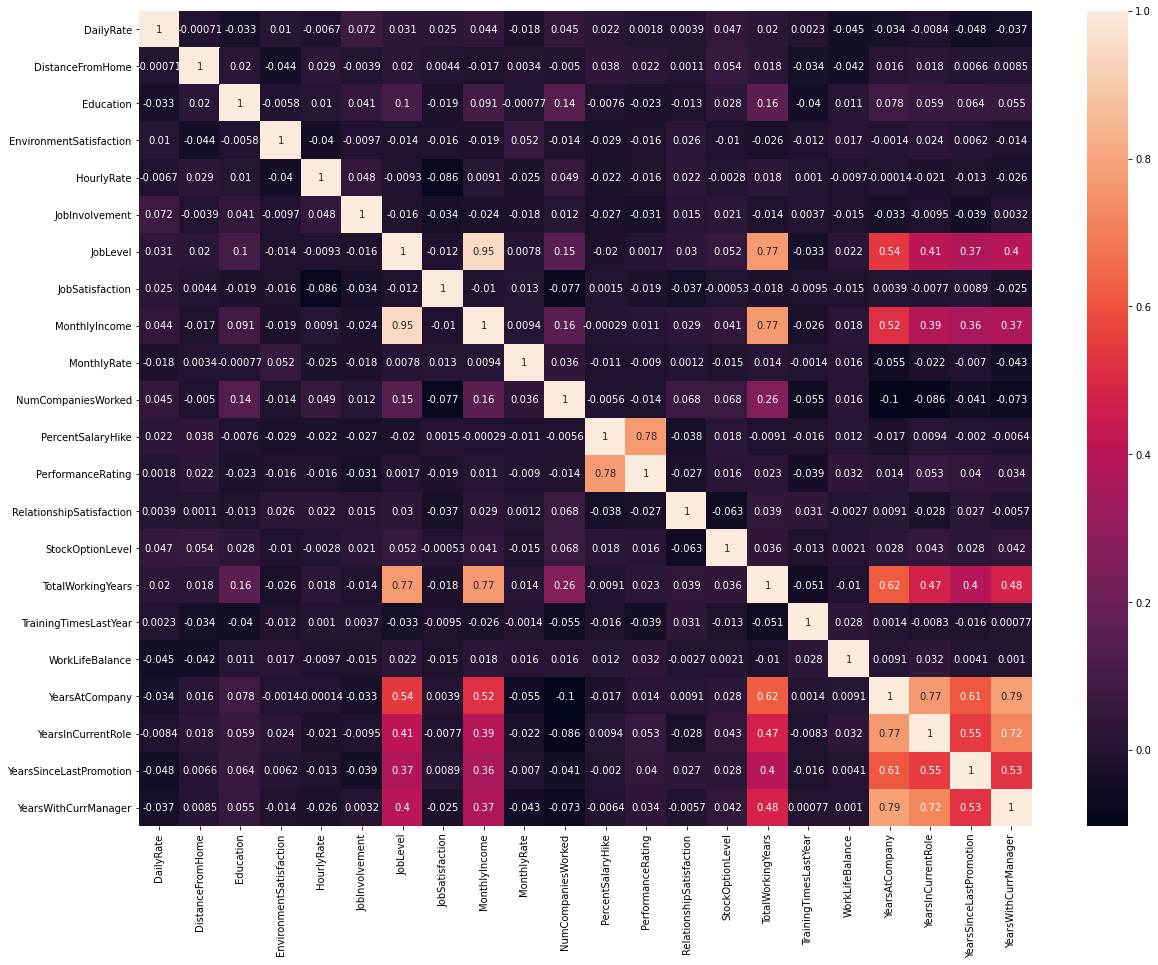

In [37]:
plt.figure(figsize=(20,15))
sns.heatmap(df[cols].corr(),annot=True)

In [38]:
def correlated_features(dataset,threshold,method='pearson'):
    col_corr = []
    cor_matrix = dataset.corr(method=method)
    for i in range(len(cor_matrix.columns)):
        for j in range(i):
            if abs(cor_matrix.iloc[i,j]) > threshold:
                colname = cor_matrix.columns[i]
                col_corr.append(colname)
    return col_corr

In [40]:
corr_features = correlated_features(df[cols],0.8)
print(len(corr_features))
for feat in corr_features:
    print(feat)

1
MonthlyIncome


## ML

In [104]:
X = pd.read_csv('Data/X_train_enc.csv')
y = pd.read_csv('Data/y_train_enc.csv')

X_test = pd.read_csv('Data/X_test_enc.csv')
y_test = pd.read_csv('Data/y_test_enc.csv')

In [105]:
X.shape,y.shape,X_test.shape,y_test.shape

((1029, 43), (1029, 1), (441, 43), (441, 1))

In [106]:
import imblearn
print(imblearn.__version__)

0.7.0


In [107]:
from imblearn.combine import SMOTETomek

In [108]:
smk = SMOTETomek(sampling_strategy=0.7,n_jobs=-1,random_state=100)
X, y = smk.fit_sample(X,y)

In [110]:
X.shape,y.shape

((1353, 43), (1353, 1))

In [77]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.tree import DecisionTreeClassifier

In [78]:
rfc = RandomForestClassifier()
ada = AdaBoostClassifier()
gbc = GradientBoostingClassifier()
lr = LogisticRegression()
svc = SVC()
gnb = GaussianNB()
xgb = XGBClassifier()
dt = DecisionTreeClassifier()

In [79]:
estimators = [
    ('ada',ada),
    
    ('gbc',gbc),
    ('lr',lr),
    ('svc',svc),
    
    ('gnb',gnb),
    
    ('xgb',xgb),
    
    ('dt',dt)
]

In [84]:
stk_classifier = StackingClassifier(estimators=estimators, 
                                    final_estimator=RandomForestClassifier(n_estimators=100),
                                    passthrough=True,
                                    cv=5,
                                    n_jobs=-1,
                                    verbose=3)

In [85]:
stk_classifier.fit(X,y['Attrition'])

StackingClassifier(cv=5,
                   estimators=[('ada', AdaBoostClassifier()),
                               ('gbc', GradientBoostingClassifier()),
                               ('lr', LogisticRegression()), ('svc', SVC()),
                               ('gnb', GaussianNB()),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None, gamma=None,
                                              gpu_id=None,
                                              importance_type='gain',
                                              interaction_constraint...
                                              min_child_weight=None,
                                              missing=nan,
                                              m

In [86]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,fbeta_score

In [87]:
y_pred = stk_classifier.predict(X_test)
print('Accuracy:',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.8752834467120182
[[357  13]
 [ 42  29]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.93       370
           1       0.69      0.41      0.51        71

    accuracy                           0.88       441
   macro avg       0.79      0.69      0.72       441
weighted avg       0.86      0.88      0.86       441

